In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#bardzo czasochłonne
psi = np.zeros((401, 81))
dze = np.zeros((401, 81))
psin = np.zeros((401, 81))
dzen = np.zeros((401, 81))
p = np.zeros((401, 81))
u = np.zeros((401, 81))
v = np.zeros((401, 81))
pn = np.zeros((401, 81))

Q = -10
eta = 1
rho = 1
dz = 0.01
jdo = 30
ido = 5
y1 = -40 * dz
y2 = 40 * dz

for i in range(-100, 151):
    for j in range(-40, 41):
        x = i * dz
        y = j * dz
        psi[i, j] = 0.5 * Q / eta * (1.0/3 * y**3 - 0.5 * y**2 * (y1 + y2) + y1 * y2 * y)
        dze[i, j] = 0.5 * Q / eta * (2 * y - y1 - y2)

for iter in range(1, 30001):
    # Warunki brzegowe na funkcję strumienia
    for j in range(-39, jdo):
        psi[-ido, j] = psi[-100, -40]
        psi[ido, j] = psi[-100, -40]
    
    for i in range(-ido, ido):
        psi[i, jdo] = psi[-100, -40]
    
    # Warunki brzegowe na wirowość
    for i in range(-99, 150):
        dze[i, -40] = 2 * (psi[i, -39] - psi[i, -40]) / dz**2
        dze[i, 40] = 2 * (psi[i, 39] - psi[i, 40]) / dz**2
    
    for j in range(-39, jdo):
        dze[-ido, j] = 2 * (psi[-ido-1, j] - psi[-ido, j]) / dz**2
        dze[ido, j] = 2 * (psi[ido+1, j] - psi[ido, j]) / dz**2
    
    for i in range(-ido+1, ido-1):
        dze[i, jdo] = 2 * (psi[i, jdo+1] - psi[i, jdo]) / dz**2
    
    dze[-ido, jdo] = dze[-ido, jdo] / 2 + (psi[-ido, jdo+1] - psi[-ido, jdo]) / dz**2
    dze[ido, jdo] = dze[ido, jdo] / 2 + (psi[ido, jdo+1] - psi[ido, jdo]) / dz**2
    
    for i in range(-99, 150):
        for j in range(-39, 40):
            psin[i, j] = (psi[i+1, j] + psi[i-1, j] + psi[i, j-1] + psi[i, j+1]) / 4 - dze[i, j] / 4 * dz**2
            dzen[i, j] = (dze[i+1, j] + dze[i-1, j] + dze[i, j-1] + dze[i, j+1]) / 4 - rho / eta / 16 * (
                (psi[i, j+1] - psi[i, j-1]) * (dze[i+1, j] - dze[i-1, j]) -
                (psi[i+1, j] - psi[i-1, j]) * (dze[i, j+1] - dze[i, j-1])
            )
    
    for i in range(-99, 150):
        for j in range(-39, 40):
            psi[i, j] = psin[i, j] * 1 + psi[i, j] * 0
            dze[i, j] = dzen[i, j] * 1 + dze[i, j] * 0
    
    if iter % 100 == 0:
        print(psi[50, 0], psi[60, 20])

for i in range(-100, 151):
    for j in range(-40, 41):
        print(i, j, psi[i, j], dze[i, j])

for j in range(jdo+1, 40):
    print(j, (psi[0, j+1] - psi[0, j-1]) / dz)

for i in range(-99, 150):
    for j in range(-39, 40):
        u[i, j] = (psi[i, j+1] - psi[i, j-1]) / 2 / dz
        v[i, j] = -(psi[i+1, j] - psi[i-1, j]) / 2 / dz
        print(i, j, u[i, j]**2 + v[i, j]**2)

for j in range(-39, 40):
    print(j, u[0, j])

for i in range(-40, 41):
    p[-100, i] = 0
    p[100, i] = dz * 200 * Q

NameError: name 'np' is not defined

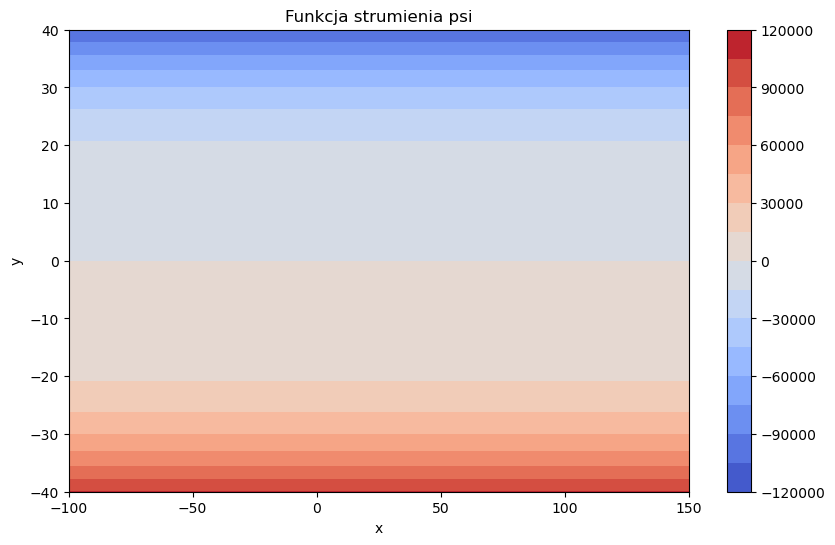

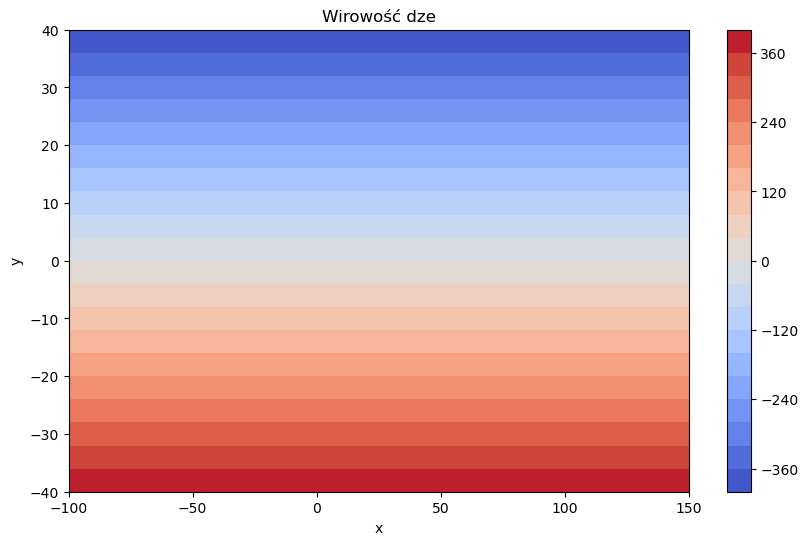

In [5]:
x = np.arange(-100, 151)
y = np.arange(-40, 41)
X, Y = np.meshgrid(x, y)

# Funkcja strumienia psi
psi = np.zeros((len(y), len(x)))
for i in range(len(x)):
    for j in range(len(y)):
        psi[j, i] = 0.5 * Q / eta * (1.0/3 * y[j]**3 - 0.5 * y[j]**2 * (y1 + y2) + y1 * y2 * y[j])

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, psi, levels=20, cmap='coolwarm')
plt.colorbar()
plt.title('Funkcja strumienia psi')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Wirowość dze
dze = np.zeros((len(y), len(x)))
for i in range(len(x)):
    for j in range(len(y)):
        dze[j, i] = 0.5 * Q / eta * (2 * y[j] - y1 - y2)

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, dze, levels=20, cmap='coolwarm')
plt.colorbar()
plt.title('Wirowość dze')
plt.xlabel('x')
plt.ylabel('y')
plt.show()